In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 3,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.00988895,  0.14695144,  0.25904918,  0.37243086,  0.48757735,
        0.60086477,  0.70625579,  0.79767245,  0.87118709,  0.92568642,
        0.96206832,  0.98212868,  0.98782188,  0.98087126,  0.96256214,
        0.93362796,  0.89419365,  0.84375602,  0.78121251,  0.70501488,
        0.61359841,  0.5063135 ,  0.38486832,  0.25445098,  0.1227048 ,
       -0.00394048, -0.12332624, -0.23694739, -0.34727857, -0.45588797,
       -0.56281322, -0.66638774, -0.76301855, -0.84742582, -0.91429216,
       -0.96066731, -0.98690897, -0.99553448, -0.98949629, -0.97108847,
       -0.94154423, -0.90096766, -0.84836352, -0.78172845, -0.69837976,
       -0.5959689 , -0.47468704, -0.3400445 , -0.20278543, -0.07297406,
        0.04647714,  0.15935385,  0.27105466,  0.38469699,  0.49980545,
        0.61241013,  0.71640521,  0.80589384,  0.87726289,  0.929663  ,
        0.96412772,  0.98248988,  0.98668706,  0.97839779,  0.95884544,
        0.9286924 ,  0.88798875,  0.83615476,  0.77202064,  0.69

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.17640173e-01],
       [  2.00000000e+01,   4.58749175e-01],
       [  3.00000000e+01,   2.87575126e-01],
       [  4.00000000e+01,   1.02874897e-01],
       [  5.00000000e+01,   2.68941447e-02],
       [  6.00000000e+01,   9.21770558e-03],
       [  7.00000000e+01,   4.33860486e-03],
       [  8.00000000e+01,   2.47932505e-03],
       [  9.00000000e+01,   1.76582334e-03],
       [  1.00000000e+02,   1.08325377e-03],
       [  1.10000000e+02,   1.31148845e-03],
       [  1.20000000e+02,   1.11469300e-03],
       [  1.30000000e+02,   1.12147781e-03],
       [  1.40000000e+02,   9.03500710e-04],
       [  1.50000000e+02,   1.31986197e-03],
       [  1.60000000e+02,   1.06893585e-03],
       [  1.70000000e+02,   1.05251546e-03],
       [  1.80000000e+02,   9.63881146e-04],
       [  1.90000000e+02,   9.65702813e-04],
       [  2.00000000e+02,   7.77539390e-04],
       [  2.10000000e+02,   7.09654414e-04],
       [  2.20000000e+02,   8.98576691e-04],
       [  

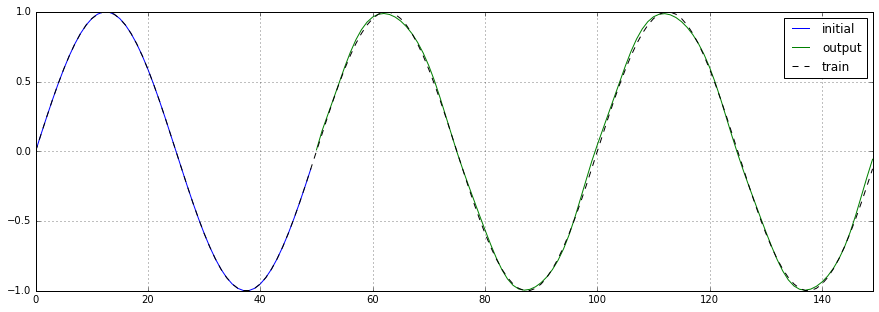

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

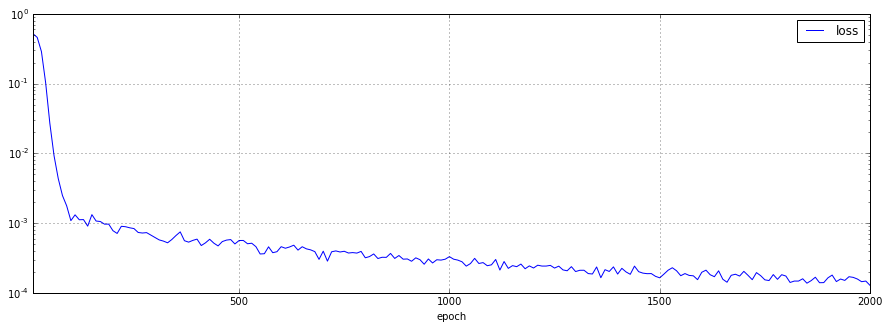

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")